In [1]:
import xarray as xr
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pathlib import Path
import gsw

In [2]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')

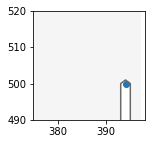

In [3]:
fig, ax = plt.subplots(figsize=(2, 2))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgray')
ax.set_ylim([490,520])
ax.set_xlim([375,398])

ax.scatter([394],[500])

In [4]:
u_lons = mesh.glamv[0, 500]
m2lon = ((u_lons[394]-u_lons[396])/(mesh.e2f[0, 500, 394:396].sum())).values
f_dist = u_lons/m2lon

h = (f_dist[394:395]-f_dist[395:396])

t_lats = mesh.gphit[0, :, 394]
m2lat = ((t_lats[500]-t_lats[502])/(mesh.e2t[0, 500:502, 394].sum()))
t_dist = t_lats/m2lat

w = (t_dist[500:501]-t_dist[501:502])

In [5]:
path = Path("/results2/SalishSea/nowcast-green.201905/")
files = [sorted(path.glob("{:%d%b%y}".format(dt.datetime(2022,6,1)+dt.timedelta(days=i)).lower()+"/SalishSea_1d_*_grid_T.nc")) for i in range(10)]
drop_vars = (
    "bounds_lon", "bounds_lat", "area", "deptht_bounds",
    "time_centered", "time_centered_bounds", "time_counter_bounds"
    )
temp = xr.open_mfdataset(files, drop_variables=drop_vars).votemper[:,0,500,394]
salt = xr.open_mfdataset(files, drop_variables=drop_vars).vosaline[:,0,500,394]

CT = gsw.CT_from_t(salt,temp,np.repeat(1,10))
density = gsw.density.rho(salt,CT,np.repeat(1,10))

In [6]:
files = ['/results/forcing/rivers/R201702DFraCElse_y2022m06d{:%d}.nc'.format(dt.datetime(2022,6,1)+dt.timedelta(days=i)) for i in range(10)]
flow = xr.open_mfdataset(files,combine='nested',concat_dim='time_counter').rorunoff[:,500,394].mean(dim='time_counter')

In [7]:
((flow/np.mean(density))*w*h).values
# something must be wrong with my units

array([[10206.05028394]])